# Traffic Light Classifier
## Demonstration notebook

## Imports
### Set imports relative to this file
If notebook is not in curent working directory path must be set

In [1]:
import os
import sys
# Get current working directory
cwd = os.path.abspath(os.path.join('..'))
# print("Is this the module path?", cwd)
MODULE_NAME = 'traffic_light_classifier'
# Check if current working directory is likely correct
cwd_folder = os.path.basename(os.path.normpath(cwd))
if cwd_folder == MODULE_NAME:
    module_path = cwd
else:
    # This must be set by the user
    module_path = "C:\\Users\\willhunt88\\OneDrive\\Documents\\Programming\\Udacity Intro to Self Driving Cars\\Project 6 - Traffic Light Classifier\\traffic_light_classifier"

# Add module to system path
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import helpers
from test_classifier import Tests
from traffic_light_classifier import TrafficLightClassifier
%matplotlib inline

### Load training set to view
Import directories defined
Images loaded and checked

In [3]:
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"
dirs = [IMAGE_DIR_TRAINING, IMAGE_DIR_TEST]
keys = ['training', 'test']

IMAGE_LIST = {}
for directory, key in zip(dirs, keys):
    path_images = os.path.join(module_path, directory)
    IMAGE_LIST[key] = helpers.load_dataset(path_images)
    n_images = len(IMAGE_LIST[key])
    if n_images == 0:
        print("No images loaded from {0} set".format(key))
    else:
        print("Loaded {0} images from {1} set".format(n_images, key))

Loaded 1187 images from training set
Loaded 297 images from test set


### Initialise classifier class

In [4]:
tlc_training = TrafficLightClassifier(IMAGE_LIST['training'])

### Inspect images visually
Plot a random sample of images

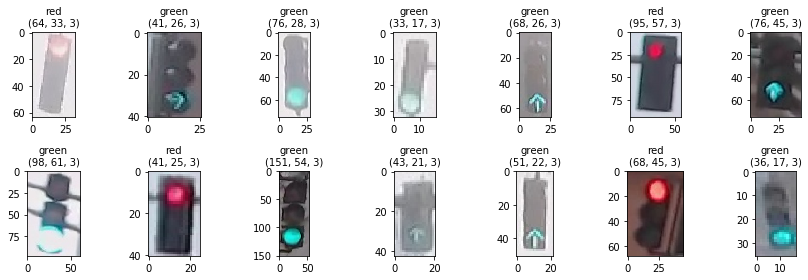

In [5]:
tlc_training.visualize_image_sample(n_plots=14, randomize=True)

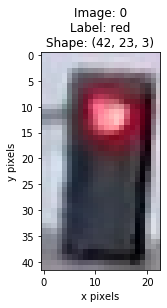

In [6]:
image_index = 0
tlc_training.visualize_image(image_index)

Take a look at standardized version of image

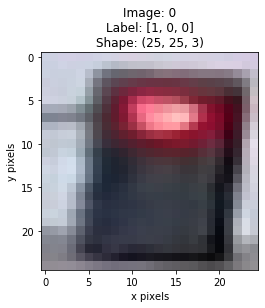

In [7]:
tlc_training.visualize_image(image_index, list_name='standardized')

Take a look at masked version

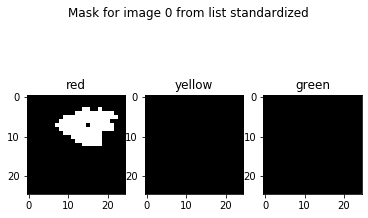

In [8]:
tlc_training.visualize_masks(image_index)

### Look at misclassfied images

In [9]:
# Can rerun classification in case changes have been made
tlc_training.classify_images(methods=['brightness'])
n_misclassified = tlc_training.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy = {:.1f} %'.format(tlc_training.get_accuracy() * 100))

Number of misclassifed images = 55
Accuracy = 95.4 %


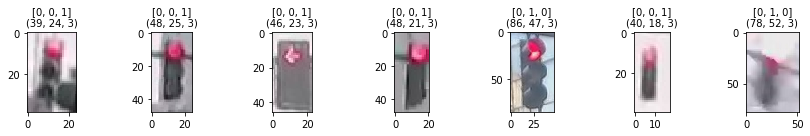

In [10]:
n_plots = min(n_misclassified, 7)
tlc_training.visualize_image_sample(list_name='misclassified', randomize=False, n_plots=n_plots)

## Use test images

In [11]:
tlc_test = TrafficLightClassifier(IMAGE_LIST['test'])
tlc_test.classify_images(methods=['brightness'])
n_misclassified = tlc_test.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy = {:.1f} %'.format(tlc_test.get_accuracy() * 100))
n_red_as_green = tlc_test.get_num_red_light_classified_as_green()
print("Number of red lights classified as green =", n_red_as_green)

Number of misclassifed images = 16
Accuracy = 94.6 %
Number of red lights classified as green = 3


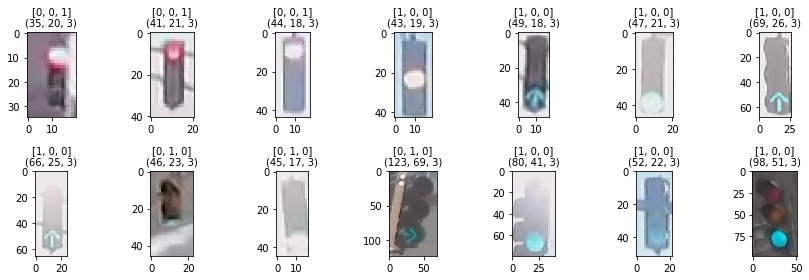

In [12]:
n_plots = min(n_misclassified, 14)
tlc_test.visualize_image_sample(list_name='misclassified', randomize=False, n_plots=n_plots)

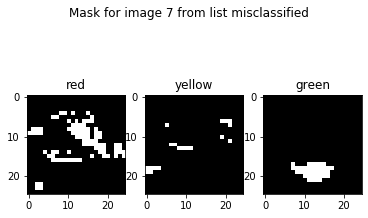

In [13]:
tlc_test.visualize_masks(7, list_name='misclassified')

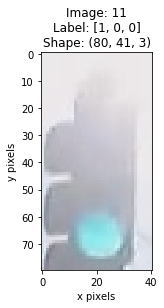

In [14]:
tlc_test.visualize_image(11, list_name='misclassified')

### Train classifier

First look at effect of hue.
**Warning, takes a long time to run things in this section!**

In [15]:
# tlc_training.plot_effect_of_hue_thresholds();
# tlc_training.plot_effect_of_masksize_sigmoid();
# tlc_training.plot_effect_of_sv_thresholds();
# tlc_training.plot_effect_of_sv_thresholds_surf();

In [16]:
tlc_test.train_classifier(IMAGE_LIST['training']);

Initial/default training accuracy at 95.37 %
	Minimum for red (0) found with H range (0.5, 4.1)
	Minimum for red (1) found with H range (168.0, 220.0)
	Minimum for yellow (0) found with H range (9.2, 70.8)
	Minimum for green (0) found with H range (50.6, 94.5)
Training accuracy at 95.11 % after optimising H values
	Minimum for red (0) found with S range (123.6, 255.0)
	Minimum for red (1) found with S range (22.1, 255.0)
	Minimum for yellow (0) found with S range (27.8, 255.0)
	Minimum for green (0) found with S range (11.1, 255.0)
Training accuracy at 98.23 % after optimising S values
	Minimum for red (0) found with V range (200.0, 255.0)
	Minimum for red (1) found with V range (104.0, 255.0)
	Minimum for yellow (0) found with V range (123.6, 255.0)
	Minimum for green (0) found with V range (47.2, 255.0)
Training accuracy at 98.65 % after optimising V values
Final training accuracy at 98.7 %
Actual (test) at 94.6 %


In [19]:
tlc_test.classify_images(methods=['brightness'])
n_misclassified = tlc_test.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy = {:.1f} %'.format(tlc_test.get_accuracy() * 100))
n_red_as_green = tlc_test.get_num_red_light_classified_as_green()
print("Number of red lights classified as green =", n_red_as_green)

KeyError: 'maskpos'